<a href="https://colab.research.google.com/github/zs-official/yt/blob/main/Salinan_dari_UAS_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis Data Kasus Deface Di ASEAN

    NAMA  : Syukirman Amir

    NIM   : 20.55.1352

    UAS   : NLP

In [34]:
import json
import numpy as np
import pandas as pd
import requests

In [35]:
# Mengimpor dataset
dataset = pd.read_csv('zoneH-2022-1-8-dataset2021.csv')

In [36]:
df = pd.DataFrame(dataset,columns=['Web Terdeface','Attacker','Kejadian','Arsip','Negara'])

In [37]:
df.tail(1500)

,Web Terdeface,Attacker,Kejadian,Arsip,Negara
0,old-sidapon-lhk.kalbarprov.go.id,AnonSec Team,2021-12-27 00:00:00,www.zone-h.org/mirror/id/39067696,INDONESIA
1,lkientikong-disnakertrans.kalb...,AnonSec Team,2021-12-27 00:00:00,www.zone-h.org/mirror/id/39067687,INDONESIA
2,ligat.kalbarprov.go.id,AnonSec Team,2021-12-27 00:00:00,www.zone-h.org/mirror/id/39067685,INDONESIA
3,layanan.kalbarprov.go.id,AnonSec Team,2021-12-27 00:00:00,www.zone-h.org/mirror/id/39067683,INDONESIA
4,komisiinformasi.kalbarprov.go.id,AnonSec Team,2021-12-27 00:00:00,www.zone-h.org/mirror/id/39067680,INDONESIA
...,...,...,...,...,...
1405,qlvb.sxd.khanhhoa.gov.vn/ks.html,KrdSec,2021-09-14 00:00:00,www.zone-h.org/mirror/id/36658292,VIETNAM
1406,qlvb.tand.khanhhoa.gov.vn/ks.html,KrdSec,2021-09-14 00:00:00,www.zone-h.org/mirror/id/36658293,VIETNAM
1407,qlvb.truongchinhtri.khanhhoa.g...,KrdSec,2021-09-14 00:00:00,www.zone-h.org/mirror/id/36658295,VIETNAM
1408,qlvb.ttcb.khanhhoa.gov.vn/ks.html,KrdSec,2021-09-14 00:00:00,www.zone-h.org/mirror/id/36658296,VIETNAM


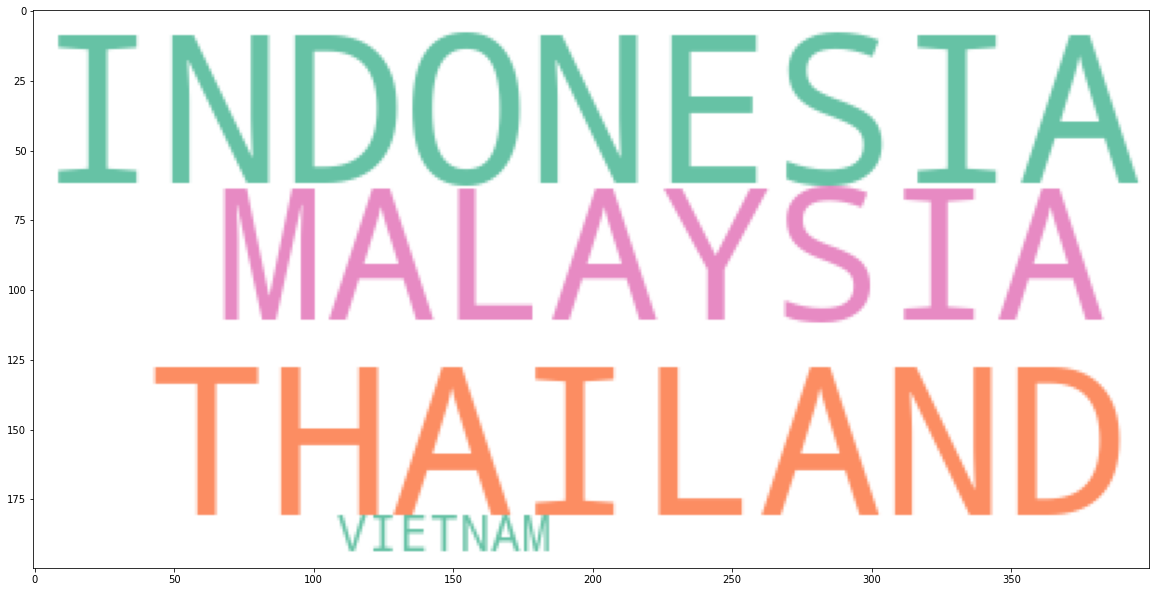

In [44]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(str(Negara) for Negara in df.Negara.unique() if len(Negara)>3)
wordcloud = WordCloud(max_words=90,colormap='Set2', background_color="white").generate(text)
plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.show()

In [45]:
df.tail(1000)

,Web Terdeface,Attacker,Kejadian,Arsip,Negara
410,muarajawa.kukarkab.go.id/krd.html,0x1998,2021-11-09 00:00:00,www.zone-h.org/mirror/id/37787173,INDONESIA
411,muarabadak.kukarkab.go.id/krd....,0x1998,2021-11-09 00:00:00,www.zone-h.org/mirror/id/37787171,INDONESIA
412,marangkayu.kukarkab.go.id/krd....,0x1998,2021-11-09 00:00:00,www.zone-h.org/mirror/id/37787170,INDONESIA
413,kotabangun.kukarkab.go.id/krd....,0x1998,2021-11-09 00:00:00,www.zone-h.org/mirror/id/37787168,INDONESIA
414,kenohan.kukarkab.go.id/krd.html,0x1998,2021-11-09 00:00:00,www.zone-h.org/mirror/id/37787167,INDONESIA
...,...,...,...,...,...
1405,qlvb.sxd.khanhhoa.gov.vn/ks.html,KrdSec,2021-09-14 00:00:00,www.zone-h.org/mirror/id/36658292,VIETNAM
1406,qlvb.tand.khanhhoa.gov.vn/ks.html,KrdSec,2021-09-14 00:00:00,www.zone-h.org/mirror/id/36658293,VIETNAM
1407,qlvb.truongchinhtri.khanhhoa.g...,KrdSec,2021-09-14 00:00:00,www.zone-h.org/mirror/id/36658295,VIETNAM
1408,qlvb.ttcb.khanhhoa.gov.vn/ks.html,KrdSec,2021-09-14 00:00:00,www.zone-h.org/mirror/id/36658296,VIETNAM


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
data_vektor = vectorizer.fit_transform(dataset['Attacker'].fillna(' '))
data_vektor

<1410x278 sparse matrix of type '<class 'numpy.int64'>'
	with 2941 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 7, random_state = 42)
lda.fit(data_vektor)

LatentDirichletAllocation(n_components=7, random_state=42)

In [59]:
data_vektor.shape

(1410, 278)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


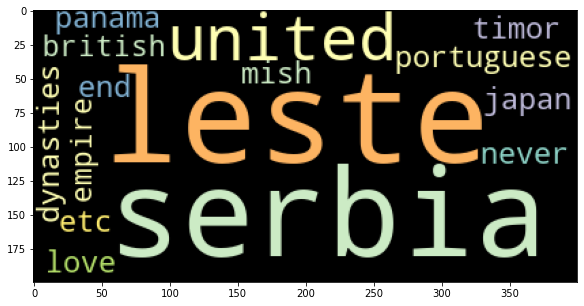

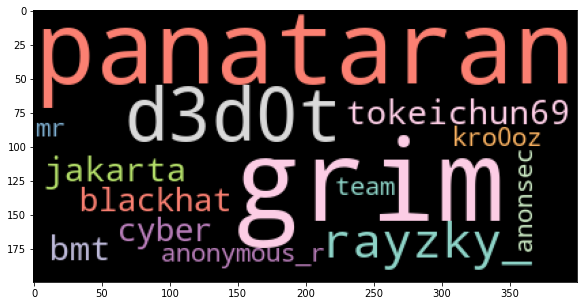

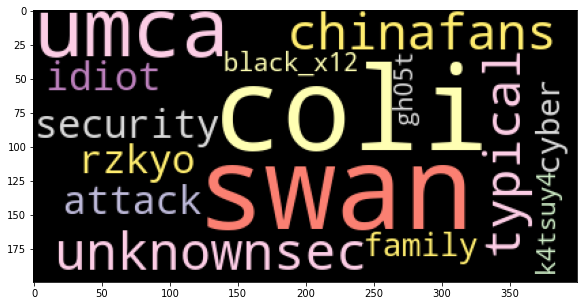

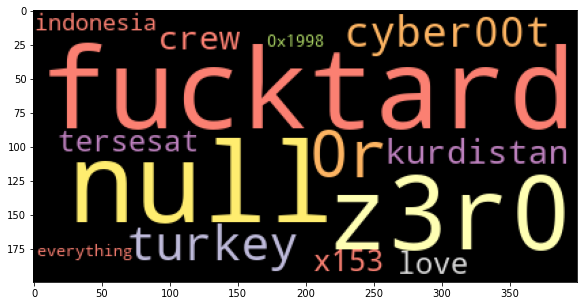

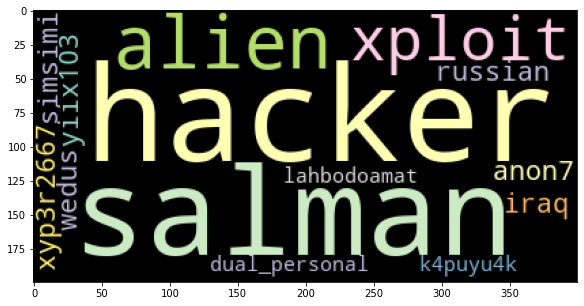

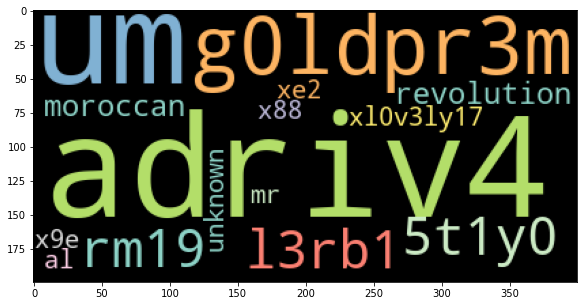

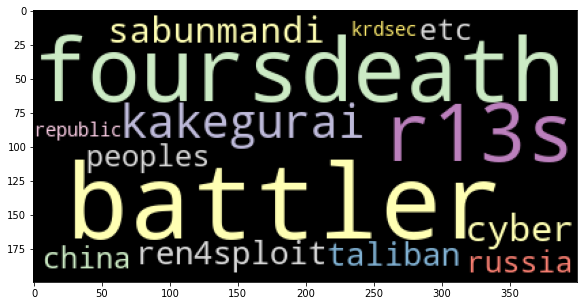

In [60]:
for index, topic in enumerate(lda.components_):
  tmps = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]]
  text = " ".join(str(topik) for topik in tmps)
  wordcloud = WordCloud(max_words=50,colormap='Set3', background_color="black").generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.show()

In [61]:
datasetzoneH = pd.read_csv('zoneH-2022-1-8-dataset2021.csv')

In [62]:
df_zoneH = datasetzoneH.rename(columns={'alpha2': 'zoneH'})[['Attacker']]

In [64]:
print(df_zoneH.head(1500))

          Attacker
0     AnonSec Team
1     AnonSec Team
2     AnonSec Team
3     AnonSec Team
4     AnonSec Team
...            ...
1405        KrdSec
1406        KrdSec
1407        KrdSec
1408        KrdSec
1409        KrdSec

[1410 rows x 1 columns]


In [65]:
df_zoneH_denormalized = pd.merge(datasetzoneH, df_zoneH, on='Attacker')

In [66]:
print(df_zoneH_denormalized.head())

                      Web Terdeface  ...     Negara
0  old-sidapon-lhk.kalbarprov.go.id  ...  INDONESIA
1  old-sidapon-lhk.kalbarprov.go.id  ...  INDONESIA
2  old-sidapon-lhk.kalbarprov.go.id  ...  INDONESIA
3  old-sidapon-lhk.kalbarprov.go.id  ...  INDONESIA
4  old-sidapon-lhk.kalbarprov.go.id  ...  INDONESIA

[5 rows x 5 columns]


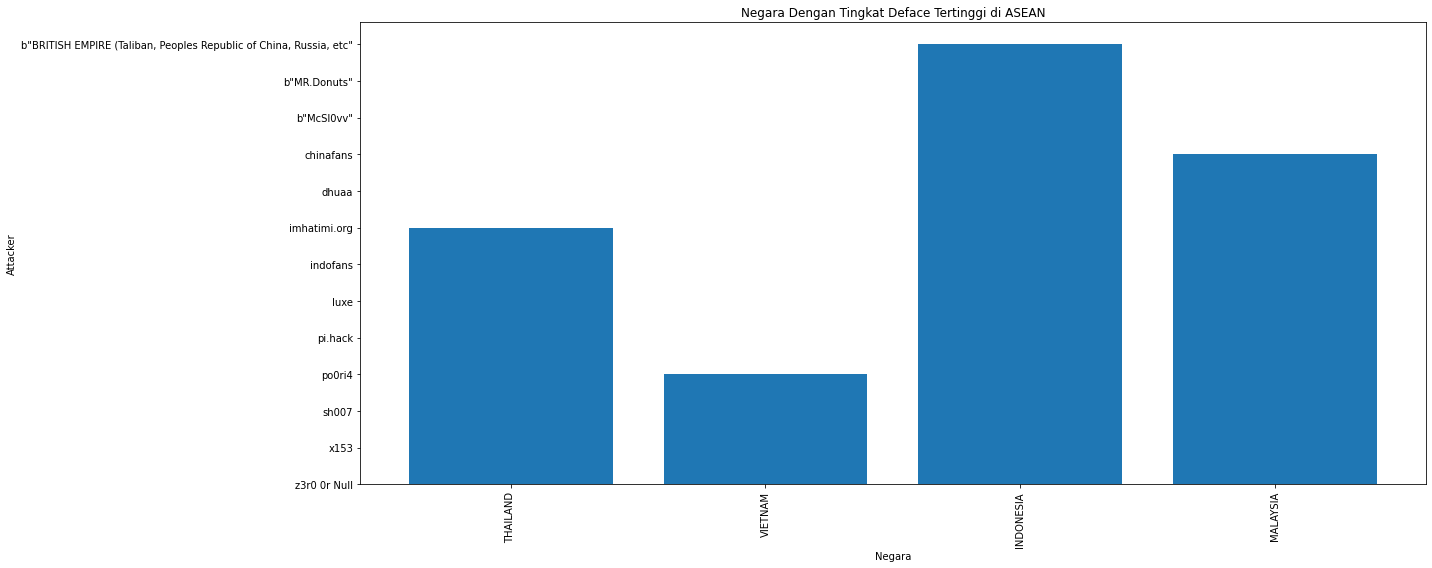

In [67]:
df_top_zoneH = df_zoneH_denormalized.sort_values(by='Attacker', ascending=False).head(100)
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_zoneH['Negara']
y = df_top_zoneH['Attacker']
plt.bar(x,y)
plt.xlabel('Negara')
plt.ylabel('Attacker')
plt.title('Negara Dengan Tingkat Deface Tertinggi di ASEAN')
plt.xticks(rotation=90)
plt.tight_layout()